In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib import reload
from filtering.filtering import kf
from filtering.filtering import particle_filter as pf

# Import and plot data

In [3]:
snp = pd.read_csv('./data/SNP.csv').set_index('Date')
oil = pd.read_csv('./data/OIL.csv').set_index('DATE')
oil = oil[oil[oil.columns[-1]] != '.'].astype('float')
snp = snp.Close
data = pd.concat([oil, snp], axis=1, sort=True).dropna()
data.columns = ['DCOILWTICO', 'OIL']

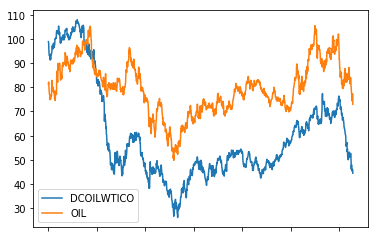

In [4]:
data.plot()

# Filtering

In [5]:
# hyperparams
dt = 1/252 # daily volatility as there are ~252 trading days
mu = (-0.4, 0.4)
kappa = (1e-3, 9)
theta = (1e-3, 1)
sigma = (1e-3, 1)
rho = (-1, 1)
v0 = (1e-3, 0.8)

In [6]:
bounds = [mu, kappa, theta, sigma, rho, v0]

### Filtering DCOILWTICO

In [7]:
oil = np.log(oil.DCOILWTICO.as_matrix())

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
reload(kf)

<module 'filtering.filtering.kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/kf.py'>

In [9]:
maxiter=1000
ekf = kf.EKFHeston(oil, dt=dt, bounds=bounds, is_log=True)
ukf = kf.UKFHeston(oil, dt=dt, bounds=bounds, is_log=True)

num_particles = 2000
pf_heston = pf.PFHeston(oil, dt=dt, N=num_particles, is_log=True)

In [10]:
# taking mean of bounds as init
init_params = [((a+b)/2) for a,b in bounds]

# EKF

In [11]:
ekf_opt = ekf.optimize(init_params, maxiter=maxiter)

i: 1
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 2
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 3
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 4
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 5
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 6
x_i: [-3.24074074e-05  5.03389259e+00  4.90613580e-01  5.07914815e-01
  2.03703704e-04  3.37211111e-01]
f_i: -6.204295201146955
i: 7
x_i: [4.51388889e-04 4.73802639e+00 4.85670370e-01 5.11622222e-01
 3.05555556e-04 3.05566667e-01]
f_i: -6.260734588313338
i: 8
x_i: [4.51388889e-04 4.73802639e+00 4.85670370e-01 5.11622222e-01
 3.05555556e-04 3.05566667e-01]
f_i: -6.260734588313338
i: 9
x_i

i: 66
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 67
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 68
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 69
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 70
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 71
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 72
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 73
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]


i: 130
x_i: [3.87768689e-03 4.12053185e+00 3.46148007e-01 5.93767023e-01
 1.30684554e-03 1.36826402e-01]
f_i: -6.511700314499759
i: 131
x_i: [3.91160293e-03 4.10908402e+00 3.44389948e-01 5.93985595e-01
 1.31238418e-03 1.36842875e-01]
f_i: -6.511700331548198
i: 132
x_i: [4.06846611e-03 4.00302902e+00 3.45233290e-01 6.05509651e-01
 1.27416818e-03 1.36832310e-01]
f_i: -6.511700337530429
i: 133
x_i: [3.98286276e-03 4.07548909e+00 3.42532675e-01 5.96660101e-01
 1.30974150e-03 1.36810756e-01]
f_i: -6.511700342404273
i: 134
x_i: [4.07380890e-03 4.00405839e+00 3.44380883e-01 6.04881726e-01
 1.27961066e-03 1.36823078e-01]
f_i: -6.51170034303268
i: 135
x_i: [3.88857620e-03 4.12735126e+00 3.44255620e-01 5.92257401e-01
 1.31650188e-03 1.36810914e-01]
f_i: -6.511700345888867
i: 136
x_i: [3.90704219e-03 4.11663629e+00 3.43880298e-01 5.93079835e-01
 1.31611858e-03 1.36813231e-01]
f_i: -6.5117003494636965
i: 137
x_i: [4.01924633e-03 4.04864609e+00 3.43094175e-01 5.99710066e-01
 1.29870848e-03 1.368200

i: 194
x_i: [4.00334474e-03 4.05567740e+00 3.44414670e-01 6.00167345e-01
 1.28902042e-03 1.36811825e-01]
f_i: -6.511700382968345
i: 195
x_i: [4.01193023e-03 4.05505898e+00 3.43828762e-01 6.00046279e-01
 1.29039511e-03 1.36814894e-01]
f_i: -6.511700385429039
i: 196
x_i: [4.04091681e-03 4.03229256e+00 3.44687780e-01 6.02991261e-01
 1.27747839e-03 1.36817456e-01]
f_i: -6.511700388861534
i: 197
x_i: [4.05270092e-03 4.02973414e+00 3.44336625e-01 6.03395752e-01
 1.27509233e-03 1.36802735e-01]
f_i: -6.511700394181194
i: 198
x_i: [4.05032026e-03 4.03496934e+00 3.44041496e-01 6.02860598e-01
 1.27640837e-03 1.36806350e-01]
f_i: -6.511700402648261
i: 199
x_i: [4.05702351e-03 4.03124738e+00 3.44270378e-01 6.03576398e-01
 1.27167364e-03 1.36819510e-01]
f_i: -6.511700413214595
i: 200
x_i: [4.05702351e-03 4.03124738e+00 3.44270378e-01 6.03576398e-01
 1.27167364e-03 1.36819510e-01]
f_i: -6.511700413214595
i: 201
x_i: [4.05702351e-03 4.03124738e+00 3.44270378e-01 6.03576398e-01
 1.27167364e-03 1.368195

f_i: -6.511709110763261
i: 258
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 259
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 260
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 261
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 262
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 263
x_i: [ 9.23900385e-03  4.04196145e+00  3.55218450e-01  9.41763044e-01
 -2.40651369e-03  1.37082603e-01]
f_i: -6.511713776528711
i: 264
x_i: [ 9.23900385e-03  4.04196145e+00  3.55218450e-01  9.41763044e-01
 -2.40651369e-03  1.37082603e-01]
f_i: -6.511713776528711
i: 265
x_i: [ 9.23900385e-03  4

i: 319
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 320
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 321
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 322
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 323
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 324
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 325
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 326
x_i: [ 1.01298502e-02  4.12402559e+00  3.5740853

f_i: -6.511719093132625
i: 380
x_i: [ 1.01404621e-02  4.05002780e+00  3.56262761e-01  9.99988096e-01
 -3.04185217e-03  1.36803129e-01]
f_i: -6.511719093348297
i: 381
x_i: [ 1.01397130e-02  4.05695347e+00  3.56355337e-01  9.99989071e-01
 -3.04742630e-03  1.36802220e-01]
f_i: -6.511719093450346
i: 382
x_i: [ 1.01397130e-02  4.05695347e+00  3.56355337e-01  9.99989071e-01
 -3.04742630e-03  1.36802220e-01]
f_i: -6.511719093450346
i: 383
x_i: [ 1.01411830e-02  4.05612428e+00  3.56268408e-01  9.99991395e-01
 -3.04684705e-03  1.36803290e-01]
f_i: -6.511719093676868
i: 384
x_i: [ 1.01400652e-02  4.05496721e+00  3.56342014e-01  1.00001029e+00
 -3.04606343e-03  1.36803472e-01]
f_i: -6.511719093731008
i: 385
x_i: [ 1.01400652e-02  4.05496721e+00  3.56342014e-01  1.00001029e+00
 -3.04606343e-03  1.36803472e-01]
f_i: -6.511719093731008
i: 386
x_i: [ 1.01400652e-02  4.05496721e+00  3.56342014e-01  1.00001029e+00
 -3.04606343e-03  1.36803472e-01]
f_i: -6.511719093731008
i: 387
x_i: [ 1.01372862e-02  4

In [12]:
print("Init Params: {}".format(init_params))
print("EKF Opt Params: {}".format(ekf_opt))

Init Params: [0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
EKF Opt Params: [ 1.01401270e-02  4.05517861e+00  3.56331950e-01  1.00000009e+00
 -3.04613819e-03  1.36804051e-01]


In [13]:
ekf_obs, ekf_vol = ekf.filter(oil, ekf_opt)

params: [0.010140126967851496, 4.055178608516501, 0.3563319499599633, 0.9999999142814312, -0.003046138192358304, 0.13680405142237068]


In [19]:
years = np.arange(len(oil)) * dt

ekf. filtering prices


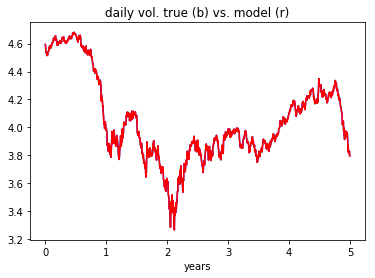

In [26]:
print('ekf. filtering prices')
plt.plot(years[1:], oil[1:],  'b-')
plt.plot(years[1:], ekf_obs, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

ekf. filtered vol
# neg vol: 0


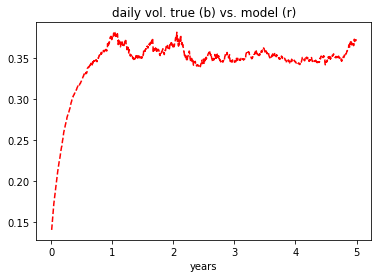

In [29]:
print('ekf. filtered vol')
print("# neg vol:", sum(ekf_vol<0))
plt.plot(years[1:], ekf_vol, 'r--')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

# UKF

In [36]:
ukf_opt = ukf.optimize(init_params, maxiter=maxiter)

[0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
i: 1
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
f_i: -6.022030130451916
[1.25000000e-04 4.61301250e+00 4.83816667e-01 5.13012500e-01
 1.25000000e-04 3.83812500e-01]
i: 2
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.250

f_i: -6.472258910640502
[3.53936132e-04 4.56159509e+00 2.29654907e-01 6.18720899e-01
 6.82948328e-04 4.36164844e-01]
[4.63503783e-04 4.53283293e+00 1.94492119e-01 6.36925558e-01
 6.94206780e-04 4.40049507e-01]
i: 23
x_i: [5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
[5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
f_i: -6.472258910640502
[6.56941443e-04 4.48920925e+00 9.04761934e-02 6.69366227e-01
 9.06742367e-04 4.53724430e-01]
[5.26318122e-04 4.51410789e+00 1.87438958e-01 6.47268092e-01
 6.40455168e-04 4.40146338e-01]
i: 24
x_i: [5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
[5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
f_i: -6.472258910640502
[6.97152788e-04 4.47254208e+00 1.13392901e-01 6.75790226e-01
 7.46311151e-04 4.49327508e-01]
i: 25
x_i: [5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-

[7.72536395e-04 4.53907951e+00 1.56597649e-01 7.39071426e-01
 1.42880222e-03 3.71272848e-01]
i: 44
x_i: [7.19534459e-04 4.53572366e+00 1.49135435e-01 7.15274441e-01
 1.22237578e-03 3.95153643e-01]
[7.19534459e-04 4.53572366e+00 1.49135435e-01 7.15274441e-01
 1.22237578e-03 3.95153643e-01]
f_i: -6.479314789200283
[6.64307543e-04 4.53501040e+00 1.35556626e-01 7.18520553e-01
 1.19528489e-03 4.00856499e-01]
[6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
i: 45
x_i: [6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
[6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
f_i: -6.481228546556162
[6.85973986e-04 4.60175086e+00 1.27986584e-01 7.27610841e-01
 1.31378707e-03 3.92417348e-01]
i: 46
x_i: [6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
[6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.879

f_i: -6.553190726342928
[1.08931606e-03 4.72127763e+00 1.23635936e-01 1.08201829e+00
 4.35470017e-03 9.16411726e-02]
i: 68
x_i: [ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
[ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
f_i: -6.553190726342928
[ 1.26725801e-03  4.77104900e+00  1.52848238e-01  1.17386611e+00
  5.25871595e-03 -4.74945184e-03]
i: 69
x_i: [ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
[ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
f_i: -6.553190726342928
[ 1.44119582e-03  4.73847491e+00  1.63016148e-01  1.19771998e+00
  5.47944631e-03 -3.16136469e-02]
[1.17728600e-03 4.72557695e+00 1.33480989e-01 1.11094372e+00
 4.63588671e-03 6.08274677e-02]
i: 70
x_i: [ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
[ 1.40804449e-03

i: 88
x_i: [1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
[1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
f_i: -6.557286102280262
[1.27860927e-03 4.74053891e+00 1.36060405e-01 1.16758521e+00
 5.17392236e-03 1.01758220e-02]
[1.25506091e-03 4.73523024e+00 1.34384260e-01 1.14990836e+00
 5.00149306e-03 2.63717404e-02]
i: 89
x_i: [1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
[1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
f_i: -6.557286102280262
[1.31812425e-03 4.73406915e+00 1.37920116e-01 1.15946282e+00
 5.09874814e-03 1.49335751e-02]
[1.29347758e-03 4.73524071e+00 1.36582697e-01 1.15749235e+00
 5.07775270e-03 1.79132826e-02]
i: 90
x_i: [1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
[1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.889

f_i: -6.557360312949685
[1.26352787e-03 4.73119235e+00 1.35757958e-01 1.15626959e+00
 5.06307139e-03 2.04446780e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
i: 110
x_i: [1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
f_i: -6.557379961240175
[1.25190590e-03 4.72925588e+00 1.35538443e-01 1.15545494e+00
 5.05402866e-03 2.16721019e-02]
i: 111
x_i: [1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
f_i: -6.557379961240175
[1.26570214e-03 4.73078485e+00 1.35120534e-01 1.15713541e+00
 5.06923015e-03 2.00195588e-02]
i: 112
x_i: [1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.1569504

f_i: -6.558176973069459
[1.34151744e-03 4.64654529e+00 1.35777716e-01 1.15965324e+00
 5.10647481e-03 1.95344108e-02]
[1.36991647e-03 4.62755470e+00 1.35118558e-01 1.16034043e+00
 5.11476823e-03 1.93947704e-02]
i: 133
x_i: [1.36991647e-03 4.62755470e+00 1.35118558e-01 1.16034043e+00
 5.11476823e-03 1.93947704e-02]
[1.36991647e-03 4.62755470e+00 1.35118558e-01 1.16034043e+00
 5.11476823e-03 1.93947704e-02]
f_i: -6.558475406798634
[1.36340968e-03 4.62363231e+00 1.35843555e-01 1.16088957e+00
 5.12212191e-03 1.89462214e-02]
[1.40031479e-03 4.59171434e+00 1.35489190e-01 1.16240086e+00
 5.14099651e-03 1.83442804e-02]
i: 134
x_i: [1.40031479e-03 4.59171434e+00 1.35489190e-01 1.16240086e+00
 5.14099651e-03 1.83442804e-02]
[1.40031479e-03 4.59171434e+00 1.35489190e-01 1.16240086e+00
 5.14099651e-03 1.83442804e-02]
f_i: -6.558820347432171
[1.41557318e-03 4.60599678e+00 1.35885253e-01 1.15779380e+00
 5.10634101e-03 2.06087254e-02]
i: 135
x_i: [1.40031479e-03 4.59171434e+00 1.35489190e-01 1.1624008

[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
i: 157
x_i: [0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
f_i: -6.590592674652553
[0.00640853 1.32598195 0.08707628 1.193841   0.00610136 0.02352599]
i: 158
x_i: [0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
f_i: -6.590592674652553
[0.00667168 1.13309229 0.08642243 1.20846164 0.00626507 0.01353542]
i: 159
x_i: [0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
f_i: -6.590592674652553
[0.00677329 1.25901933 0.08814947 1.18221318 0.00606394 0.02379903]
[0.00807609 0.55900339 0.0788768  1.17471253 0.00618894 0.0282227 ]
i: 160
x_i: [0.00807609 0.55900339 0.0788768  1.17471253 0.00618894 0.0282227 ]
[0.00807609 0.55900339 0.0788768  1.17471253 0.00618894 0.028222

i: 185
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
f_i: -6.685782905056842
[0.00829192 0.60670373 0.07846766 1.14501745 0.00597654 0.04258864]
[0.00817627 0.66589946 0.07979127 1.14791745 0.00598569 0.04029613]
i: 186
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
f_i: -6.685782905056842
[0.00834059 0.60059217 0.07871408 1.14493794 0.00598233 0.04125456]
i: 187
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
f_i: -6.685782905056842
[0.00835232 0.59365492 0.07849958 1.14377887 0.00597476 0.04226626]
[0.0082077  0.65039812 0.07946921 1.14741747 0.00598543 0.04063972]
i: 188
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.042376

i: 210
x_i: [0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
[0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
f_i: -6.687162722129199
[0.00831123 0.62046034 0.07855593 1.14085632 0.00594499 0.04450774]
i: 211
x_i: [0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
[0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
f_i: -6.687162722129199
[0.00831261 0.62251859 0.07855887 1.14049446 0.00594209 0.04464514]
i: 212
x_i: [0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
[0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
f_i: -6.687162722129199
[0.0083158  0.62265872 0.07860275 1.14011166 0.00593958 0.04481507]
[0.00832291 0.62468021 0.07861673 1.13909445 0.00593222 0.04528337]
i: 213
x_i: [0.00832291 0.62468021 0.07861673 1.13909445 0.00593222 0.04528337]
[0.00832291 0.62468021 0.07861673 1.13909445 0.00593222 0.04528337]
f_i: -6.687411906753518
[0.0083217  0.62352138 0.0785905  1.1392

f_i: -6.691991686903516
[0.00859926 0.68404724 0.07915557 1.09902432 0.00564369 0.06484042]
i: 241
x_i: [0.00855317 0.67404024 0.07909937 1.10575087 0.00569227 0.06153088]
[0.00855317 0.67404024 0.07909937 1.10575087 0.00569227 0.06153088]
f_i: -6.691991686903516
[0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
[0.00859298 0.68260808 0.07937408 1.1000188  0.00565172 0.06421088]
i: 242
x_i: [0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
[0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
f_i: -6.692039378979877
[0.00855496 0.67568096 0.07915569 1.10530921 0.00568903 0.06171005]
[0.00857465 0.67754383 0.0791001  1.10270177 0.00567033 0.06307678]
i: 243
x_i: [0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
[0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
f_i: -6.692039378979877
[0.00855128 0.67372949 0.07916337 1.10599573 0.00569425 0.06137944]
i: 244
x_i: [0.00858059 0.67964235 0.07923368 1.1017

[0.00860459 0.65161262 0.08269157 1.10058282 0.00567188 0.06314153]
i: 270
x_i: [0.00860459 0.65161262 0.08269157 1.10058282 0.00567188 0.06314153]
[0.00860459 0.65161262 0.08269157 1.10058282 0.00567188 0.06314153]
f_i: -6.693879588537253
[0.00861333 0.65716127 0.08251432 1.09918964 0.00566073 0.06378268]
[0.00863858 0.6550379  0.08353548 1.0961224  0.00564312 0.06495136]
i: 271
x_i: [0.00863858 0.6550379  0.08353548 1.0961224  0.00564312 0.06495136]
[0.00863858 0.6550379  0.08353548 1.0961224  0.00564312 0.06495136]
f_i: -6.69417187130117
[0.00857135 0.64640657 0.08274342 1.10532274 0.00570617 0.0606937 ]
[0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126]
i: 272
x_i: [0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126]
[0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126]
f_i: -6.69458633596557
[0.00856024 0.63383745 0.08371521 1.10758098 0.00572728 0.05936578]
i: 273
x_i: [0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126

[0.00855    0.60742806 0.0872119  1.11062753 0.00576478 0.05671488]
i: 298
x_i: [0.00855663 0.61145365 0.08687897 1.10951657 0.00575523 0.05735931]
[0.00855663 0.61145365 0.08687897 1.10951657 0.00575523 0.05735931]
f_i: -6.695120390401789
[0.00855376 0.61487321 0.08631328 1.10962732 0.0057535  0.05749906]
[0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
i: 299
x_i: [0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
[0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
f_i: -6.695123231480467
[0.00855703 0.6086504  0.08724528 1.10962025 0.00575763 0.05720628]
[0.00854712 0.60948895 0.08686162 1.11088371 0.00576506 0.05669111]
i: 300
x_i: [0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
[0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
f_i: -6.695123231480467
[0.00855535 0.60826308 0.08722501 1.10990421 0.00575964 0.05706619]
[0.00854827 0.60955758 0.08689193 1.11071601 0.00576397 0.05676708]
i: 301
x

f_i: -6.695125468689662
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855132 0.60880051 0.08708479 1.11043019 0.00576279 0.05682859]
i: 327
x_i: [0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
f_i: -6.695125678178515
[0.00854867 0.60817907 0.08708642 1.11080061 0.00576548 0.05665104]
i: 328
x_i: [0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
f_i: -6.695125678178515
[0.00854974 0.60747114 0.08721077 1.11071434 0.00576542 0.05665288]
i: 329
x_i: [0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
f_i: -6.695125678178515
[0.00854994 0.60831814 0.08709701 1.11062468 0.00576426 0.05673653]
[0.00854978 0.60838894 0.08707649 1.11064329 0.00576431 0.05673473]
i: 330
x_i: [0.00854994 0.60831814 0.08709701 1.1106

i: 357
x_i: [0.00855265 0.60915192 0.08703061 1.1103614  0.00576216 0.05685178]
[0.00855265 0.60915192 0.08703061 1.1103614  0.00576216 0.05685178]
f_i: -6.6951336132135415
[0.00855792 0.60990025 0.08707478 1.10966473 0.00575734 0.05717221]
[0.00855978 0.610329   0.08705659 1.10943842 0.00575565 0.05727967]
i: 358
x_i: [0.00855978 0.610329   0.08705659 1.10943842 0.00575565 0.05727967]
[0.00855978 0.610329   0.08705659 1.10943842 0.00575565 0.05727967]
f_i: -6.695134610518508
[0.00855785 0.61026388 0.08701202 1.10967468 0.00575715 0.05718223]
[0.00855896 0.61085002 0.08694573 1.10954194 0.00575594 0.05725817]
i: 359
x_i: [0.00855896 0.61085002 0.08694573 1.10954194 0.00575594 0.05725817]
[0.00855896 0.61085002 0.08694573 1.10954194 0.00575594 0.05725817]
f_i: -6.695135636145838
[0.00855866 0.609658   0.08710957 1.10964808 0.00575742 0.05715475]
[0.00856006 0.6094942  0.0871535  1.10954185 0.0057569  0.05717815]
i: 360
x_i: [0.00856006 0.6094942  0.0871535  1.10954185 0.0057569  0.05717

f_i: -6.695239508917631
[0.00860209 0.60265267 0.08775376 1.11017465 0.00576842 0.05533277]
i: 388
x_i: [0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
[0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
f_i: -6.695239508917631
[0.00862398 0.60369727 0.0879498  1.10839398 0.00575725 0.05587749]
i: 389
x_i: [0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
[0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
f_i: -6.695239508917631
[0.00862613 0.60507943 0.08776977 1.10826714 0.00575569 0.05593641]
[0.00864475 0.60430048 0.08799229 1.10753106 0.00575257 0.05583575]
i: 390
x_i: [0.00864475 0.60430048 0.08799229 1.10753106 0.00575257 0.05583575]
[0.00864475 0.60430048 0.08799229 1.10753106 0.00575257 0.05583575]
f_i: -6.695251067894718
[0.0086373  0.60614277 0.08750982 1.10831573 0.00575608 0.05562324]
[0.0086587  0.60658635 0.08742144 1.1078982  0.00575446 0.0552863 ]
i: 391
x_i: [0.0086587  0.60658635 0.08742144 1.1078

i: 415
x_i: [0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
[0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
f_i: -6.703779555534557
[0.00871124 0.61012214 0.08738479 1.10489898 0.0057356  0.05580527]
[0.00869561 0.61082128 0.08727956 1.10524276 0.00573639 0.05606099]
i: 416
x_i: [0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
[0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
f_i: -6.703779555534557
[0.00870799 0.60811318 0.08762703 1.10530787 0.00573951 0.05555606]
[0.0086976  0.61140539 0.08721043 1.1050935  0.00573512 0.05612289]
[0.00871359 0.60929966 0.0874719  1.10502223 0.00573716 0.05562557]
[0.00871938 0.61084325 0.08741063 1.10426001 0.00573142 0.05599837]
[0.00871865 0.61093005 0.08740425 1.10425142 0.00573126 0.056028  ]
[0.00871948 0.61077576 0.08741739 1.10427166 0.00573155 0.05598548]
[0.00871971 0.61085578 0.08740513 1.10426533 0.00573147 0.05598585]
[0.00871897 0.61169653 0.08730113 1.10415497

f_i: -6.70502986962187
[0.00874427 0.61086626 0.08753676 1.10327084 0.0057265  0.05590685]
[0.00874289 0.61082464 0.08753024 1.10334565 0.00572693 0.05589803]
i: 439
x_i: [0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
[0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
f_i: -6.70502986962187
[0.00874378 0.61078402 0.08753842 1.10332097 0.00572685 0.05588636]
[0.00874313 0.61085294 0.08753012 1.10332531 0.00572679 0.05590499]
i: 440
x_i: [0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
[0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
f_i: -6.70502986962187
[0.00874388 0.61084473 0.08753551 1.10329529 0.00572665 0.05590184]
[0.00874314 0.61082966 0.08753155 1.10333306 0.00572686 0.05589898]
i: 441
x_i: [0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
[0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
f_i: -6.70502986962187
[0.00874315 0.61080795 0.08753495 1.10333386 0.00572688 

In [37]:
print("Init Params: {}".format(init_params))
print("EKF Opt Params: {}".format(ekf_opt))
print("UKF Opt Params: {}".format(ukf_opt))

Init Params: [0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
EKF Opt Params: [ 1.01401270e-02  4.05517861e+00  3.56331950e-01  1.00000009e+00
 -3.04613819e-03  1.36804051e-01]
UKF Opt Params: [0.00874331 0.61083811 0.08753243 1.10332178 0.00572679 0.05590131]


In [38]:
ukf_obs, ukf_vol = ekf.filter(oil, ukf_opt)

params: [0.00874331436046263, 0.6108381139458515, 0.08753243358624391, 0.8966782223012517, 0.005726790089885275, 0.05590130718728077]


ekf. filtering prices


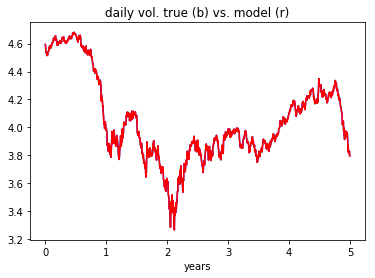

In [39]:
print('ekf. filtering prices')
plt.plot(years[1:], oil[1:],  'b-')
plt.plot(years[1:], ukf_obs, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

ukf. filtered vol
# neg vol: 0


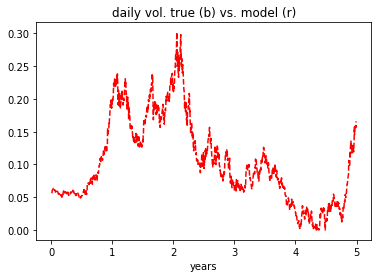

In [46]:
print('ukf. filtered vol')
print("# neg vol:", sum(ukf_vol<0))
plt.plot(years[1:], ukf_vol, 'r--')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

# Particle Filter

In [53]:
v0 = ukf_opt[-1] # use ukf v0
pf_bounds = bounds
pf_bounds[-1] = v0
pf_vol, param_steps = pf_heston.filter(pf_bounds, predict_obs=False)

resampling since: 159.92074792514578
resampling since: 449.62504976325687
resampling since: 167.90281929998028
resampling since: 430.4951445953167
resampling since: 1373.131265223327
resampling since: 1102.26551483381
resampling since: 1367.53418753583
resampling since: 1231.5027480807305
resampling since: 1311.043783898568
resampling since: 1286.901508768047
resampling since: 1140.8051063056937
resampling since: 1242.3973240468672
resampling since: 1316.8685458888124
resampling since: 1143.7038598092495
resampling since: 1082.0712102697576
resampling since: 1011.5740718704805
resampling since: 844.2064331618842
resampling since: 600.8379917177018
resampling since: 476.04724040901107
resampling since: 1344.4602048591992
resampling since: 1182.8178535188113
resampling since: 841.4051938835556
resampling since: 839.8287989693512
resampling since: 1383.7978359868791
resampling since: 1188.1165239492375
resampling since: 1175.4025972732545
resampling since: 1374.8192968105138
resampling si

resampling since: 1084.960415477776
resampling since: 615.8427252532113
resampling since: 1147.197391287628
resampling since: 1375.0250123504675
resampling since: 1065.9906002171656
resampling since: 1229.676348673308
resampling since: 662.2667086589977
resampling since: 1052.8737115749288
resampling since: 577.6165985894573
resampling since: 1303.930478282021
resampling since: 694.0742084223524
resampling since: 786.8797701593678
resampling since: 1376.4591872830601
resampling since: 1242.5904592141978
resampling since: 359.110287622029
resampling since: 888.4661650464143
resampling since: 1248.673263708035
resampling since: 768.0998534251033
resampling since: 1210.4520513564944
resampling since: 1016.0062558615407
resampling since: 1258.4312089679672
resampling since: 1324.1991391782644
resampling since: 1362.5133645821138
resampling since: 1187.8995280015893
resampling since: 972.6422255432631
resampling since: 1221.8548248810291
resampling since: 1275.3677986923763
resampling since

resampling since: 1083.4145341198112
resampling since: 1353.493519967233
resampling since: 938.1390527142439
resampling since: 1192.6579515990113
resampling since: 1021.5339770909683
resampling since: 1173.594283525679
resampling since: 1296.4427115311055
resampling since: 803.6066182351307
resampling since: 1218.7649939706173
resampling since: 1312.1171366955805
resampling since: 898.2075173470494
resampling since: 1083.1036757694974
resampling since: 1172.0587492193508
resampling since: 1287.2132894413912
resampling since: 1354.0720403837242
resampling since: 1369.3601128421963
resampling since: 1315.7387149471501
resampling since: 203.22736455505208
resampling since: 1379.345731653668
resampling since: 538.6787287086333
resampling since: 1279.3911042244565
resampling since: 1311.200154863603
resampling since: 1204.7950338798132
resampling since: 1272.5382833236563
resampling since: 279.62944057549294
resampling since: 1276.191730748951
resampling since: 1129.0278595825637


pf filtered vol


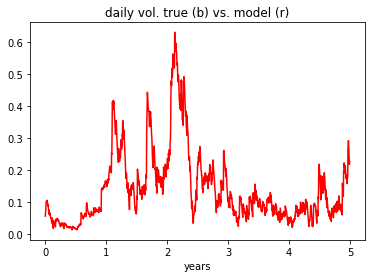

In [59]:
print('pf filtered vol')
plt.plot(years[:], pf_vol[:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

In [ ]:
print('pf filtered vol')
plt.plot(years[:], pf_vol[:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()